# Which Debts Are Worth the Bank's Effort?

# Description
After a debt has been legally declared "uncollectable" by a bank, the account is considered to be "charged-off." But that doesn't mean the bank simply walks away from the debt. They still want to collect some of the money they are owed. In this project, you will look at a situation where a bank assigned delinquent customers to different recovery strategies based on the expected amount the bank believed it would recover from the customer. The goal for the data scientist is to determine in this non-random assignment whether the incremental amount the bank earns exceeded the additional cost of assigning customers to a higher recovery strategy.
Threshold assignments like this also one occur in medicine (above a certain temperature you get medicine), education (above a certain test score students get admitted to a special class), other areas of finance (above a certain wealth customers get different levels of service), and public sector (below a certain income someone is eligible for housing benefits). Regression discontinuity is an intuitive and useful analysis method in any situation of a threshold assignment.

# Import the data

In [94]:
# Import necessary libraries
# pandas is used for data manipulation and analysis and 'pd' is a commonly used abbreviation for pandas
import pandas as pd     
# numpy is used for numerical operations and working with arrays and matrices
import numpy as np      
# matplotlib is used for data visualization such as Matplotlib is used for creating various types of plots and charts
import matplotlib.pyplot as plt 
# seaborn for statistical data visualization which is built on top of matplotlib and provides a high-level interface 
import seaborn as sns  
# scipy.stats for statistical analysis functions
from scipy import stats  
import statsmodels.api as sm  # Import the StatsModels library

In [95]:
#This line reads a CSV (Comma-Separated Values) file named "bank_data.csv" from the specified file path and assigns the data to a variable named 'data'
# pd.read_csv(): This is a pandas function used to read data from a CSV file
# r"C:\Users\ADMIN\Downloads\bank_data.csv": This is the file path to the CSV file you want to read. The 'r' before the string denotes a raw string, which is used to interpret backslashes as literal characters

data = pd.read_csv(r"C:\Users\ADMIN\Downloads\bank_data.csv")  

# Understanding the data

In [96]:
data.head() # Display the first few rows of the Data

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [97]:
# Display the last few rows of the Data
data.tail() 

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female
1881,522,9964,16706.305920,Level 4 Recovery,53,Male


In [98]:
# Get the dimensions (number of rows and columns) of the Data
data.shape

(1882, 6)

In [99]:
# Access the column names of the Data
data.columns

Index(['id', 'expected_recovery_amount', 'actual_recovery_amount',
       'recovery_strategy', 'age', 'sex'],
      dtype='object')

In [100]:
# Count the number of unique values in each column of the Data
data.nunique()

id                          1882
expected_recovery_amount    1529
actual_recovery_amount      1882
recovery_strategy              5
age                           67
sex                            2
dtype: int64

In [101]:
# Generate descriptive statistics for each numeric column of the Data
data.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


In [102]:
# provides an overview of your DataFrame, including the number of rows, the number of columns, and information about each column's data type and non-null counts.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [103]:
# Get the unique values from the 'id' column of the DataFrame
data['id'].unique()

array([2030, 1150,  380, ...,  313, 1781,  522], dtype=int64)

In [104]:
# Get the unique values from the 'expected_recovery_amount' column of the DataFrame. When called, it returns an array or list containing all the unique values found in that specific column
data['expected_recovery_amount'].unique()

array([ 194,  486,  527, ..., 9859, 9920, 9964], dtype=int64)

In [105]:
# Get the unique values from the 'actual_recovery_amount' column of the DataFrame. When called, it returns an array or list containing all the unique values found in that specific column.
data['actual_recovery_amount'].unique()

array([  263.54   ,   416.09   ,   429.35   , ..., 30209.18179,
       20386.23219, 16706.30592])

In [106]:
## Get the unique values from the 'recovery_strategy' column of the DataFrame. When called, it returns an array or list containing all the unique values found in that specific column.
data['recovery_strategy'].unique()

array(['Level 0 Recovery', 'Level 1 Recovery', 'Level 2 Recovery',
       'Level 3 Recovery', 'Level 4 Recovery'], dtype=object)

In [107]:
# Get the unique values from the 'age' column of the DataFrame. When called, it returns an array or list containing all the unique values found in that specific column.
data['age'].unique()

array([19, 25, 27, 34, 35, 33, 22, 31, 18, 32, 26, 23, 29, 28, 21, 24, 20,
       36, 30, 39, 45, 42, 44, 40, 41, 56, 37, 43, 38, 48, 47, 52, 49, 50,
       57, 51, 58, 53, 59, 61, 60, 46, 55, 54, 63, 64, 66, 76, 71, 62, 65,
       70, 67, 69, 68, 75, 78, 74, 80, 77, 73, 81, 72, 83, 84, 79, 82],
      dtype=int64)

In [108]:
# Get the unique values from the 'sex' column of the DataFrame. When called, it returns an array or list containing all the unique values found in that specific column.
data['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [109]:
# Count the occurrences how many times each unique value appears in the column 
data['id'].value_counts() 

2030    1
621     1
1525    1
978     1
1884    1
       ..
1876    1
1553    1
1285    1
359     1
522     1
Name: id, Length: 1882, dtype: int64

In [110]:
# Count the occurrences how many times each unique value appears in the column 
data['expected_recovery_amount'].value_counts() 

1386    5
1481    4
1634    4
1168    4
1120    4
       ..
1893    1
1886    1
1879    1
1878    1
9964    1
Name: expected_recovery_amount, Length: 1529, dtype: int64

In [111]:
# Count the occurrences how many times each unique value appears in the column 
data['actual_recovery_amount'].value_counts()

263.540000      1
5392.977189     1
673.124046      1
5531.674176     1
7262.631211     1
               ..
1432.155328     1
1229.614336     1
1449.713653     1
1230.649431     1
16706.305920    1
Name: actual_recovery_amount, Length: 1882, dtype: int64

In [112]:
# Count the occurrences how many times each unique value appears in the column 
data['recovery_strategy'].value_counts()

Level 1 Recovery    670
Level 3 Recovery    368
Level 2 Recovery    333
Level 4 Recovery    264
Level 0 Recovery    247
Name: recovery_strategy, dtype: int64

In [113]:
# Count the occurrences how many times each unique value appears in the column 
data['age'].value_counts()

33    82
31    68
29    68
35    67
34    62
      ..
80     5
83     5
73     4
81     4
79     1
Name: age, Length: 67, dtype: int64

In [114]:
# Count the occurrences how many times each unique value appears in the column 
data['sex'].value_counts()

Male      973
Female    909
Name: sex, dtype: int64

In [115]:
# Sort the DataFrame based on the 'id' column 
data.sort_values(by='id')

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
1852,6,8974,16456.835330,Level 4 Recovery,65,Female
1186,7,2770,4023.127789,Level 2 Recovery,40,Female
363,8,1129,741.458388,Level 1 Recovery,33,Female
157,9,899,398.145000,Level 0 Recovery,41,Male
1787,10,7220,9938.698547,Level 4 Recovery,54,Male
...,...,...,...,...,...,...
1819,2052,7964,12921.511250,Level 4 Recovery,53,Male
1450,2053,3775,9719.999402,Level 3 Recovery,57,Male
840,2054,1829,2216.847848,Level 1 Recovery,31,Male
1364,2055,3399,3577.966605,Level 3 Recovery,51,Male


In [116]:
# Sort the DataFrame based on the column 
data.sort_values(by='expected_recovery_amount')

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


In [117]:
# Sort the DataFrame based on the column 
data.sort_values(by='actual_recovery_amount')

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
17,583,606,200.42500,Level 0 Recovery,26,Male
11,1913,582,201.81500,Level 0 Recovery,31,Male
8,1828,562,201.86500,Level 0 Recovery,22,Female
95,474,793,204.53500,Level 0 Recovery,27,Male
6,221,549,221.58500,Level 0 Recovery,33,Male
...,...,...,...,...,...,...
1659,617,5345,29827.01222,Level 4 Recovery,66,Female
1590,216,4774,29831.50666,Level 3 Recovery,60,Female
1879,313,9859,30209.18179,Level 4 Recovery,58,Female
1837,214,8619,30973.45209,Level 4 Recovery,71,Female


In [118]:
# Sort the DataFrame based on the column 
data.sort_values(by='recovery_strategy')

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
157,9,899,398.145000,Level 0 Recovery,41,Male
158,520,900,504.790000,Level 0 Recovery,34,Male
159,1036,900,539.535000,Level 0 Recovery,34,Female
160,1383,900,554.745000,Level 0 Recovery,24,Male
...,...,...,...,...,...,...
1711,1370,5970,8077.266424,Level 4 Recovery,68,Male
1712,1123,5980,9951.484452,Level 4 Recovery,81,Male
1713,1401,5983,10469.257190,Level 4 Recovery,52,Male
1699,1076,5724,9844.398322,Level 4 Recovery,77,Male


In [119]:
# Sort the DataFrame based on the' column
data.sort_values(by='age')

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
115,1343,827,402.605000,Level 0 Recovery,18,Male
434,725,1219,1049.376478,Level 1 Recovery,18,Female
357,1156,1120,983.565049,Level 1 Recovery,18,Female
699,1404,1601,2474.534732,Level 1 Recovery,18,Female
486,1989,1286,803.946956,Level 1 Recovery,18,Female
...,...,...,...,...,...,...
1793,673,7288,16258.494900,Level 4 Recovery,84,Male
1794,1000,7336,12133.711570,Level 4 Recovery,84,Female
1705,724,5868,8699.643001,Level 4 Recovery,84,Male
1782,2029,7179,10339.712670,Level 4 Recovery,84,Female


In [120]:
# Sort the DataFrame based on the column 
data.sort_values(by='sex')

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
940,971,2061,2802.929366,Level 2 Recovery,27,Female
1473,67,3907,3296.466299,Level 3 Recovery,60,Female
755,457,1691,685.582703,Level 1 Recovery,23,Female
756,16,1694,1829.859615,Level 1 Recovery,22,Female
759,791,1699,1977.199262,Level 1 Recovery,20,Female
...,...,...,...,...,...,...
788,498,1739,1348.560546,Level 1 Recovery,34,Male
786,1534,1735,1065.101513,Level 1 Recovery,36,Male
785,1599,1731,1102.561316,Level 1 Recovery,25,Male
749,593,1684,2278.627677,Level 1 Recovery,45,Male


In [121]:
# Sort the DataFrame by index labels in ascending order
data.sort_index()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


In [122]:
# Extract the 'expected_recovery_amount' column from the DataFrame and assign it to 'column_name'
column_name = data.expected_recovery_amount

# Display the first few rows of the 'column_name'
column_name.head()

0    194
1    486
2    527
3    536
4    541
Name: expected_recovery_amount, dtype: int64

# Missing Values

Missing values, occur when you don't have data stored for certain variables

In [123]:
# Mode is the value that appears most frequently in a given set of data points
# Calculate the mode of the 'id' column and get its first (most frequent) value
mode1 = data['id'].mode().values[0]

# Replace NaN (missing values) in the 'id' column with the mode value
data['id'] = data['id'].replace(np.nan, mode1)

In [124]:
# Calculate the mode of the column and get its first (most frequent) value
mode1=data['expected_recovery_amount'].mode().values[0]
data['expected_recovery_amount']=data['expected_recovery_amount'].replace(np.nan,mode1)

In [125]:
# Calculate the mode of the' column and get its first (most frequent) value
mode1=data['actual_recovery_amount'].mode().values[0]
data['actual_recovery_amount']=data['actual_recovery_amount'].replace(np.nan,mode1)

In [126]:
# Calculate the mode of the column and get its first (most frequent) value
mode1=data['age'].mode().values[0]
data['age']=data['age'].replace(np.nan,mode1)

In [127]:
# Calculate the mode of the column and get its first (most frequent) value
mode1=data['recovery_strategy'].mode().values[0]
data['recovery_strategy']=data['recovery_strategy'].replace(np.nan,mode1)

In [128]:
# Calculate the mode of the column and get its first (most frequent) value
mode1=data['sex'].mode().values[0]
data['sex']=data['sex'].replace(np.nan,mode1)

# Null Values

In [129]:
# Check for missing values in the DataFrame where each element is a boolean value indicating whether it is missing (True) or not missing (False
data.isnull()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1877,False,False,False,False,False,False
1878,False,False,False,False,False,False
1879,False,False,False,False,False,False
1880,False,False,False,False,False,False


In [130]:
# Check for duplicate rows in the DataFrame and create a boolean Series
duplicate = data.duplicated()

# Calculate and print the number of duplicate rows
print(duplicate.sum())

# Filter the DataFrame to show the duplicate rows
data[duplicate]
# Count the number of missing values in each column of the DataFrame
data.isnull().sum()

0


id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

# Handling Duplicate Values

In [131]:
# Check for duplicate rows in the DataFrame and create a boolean Series
duplicate = data.duplicated()

# Calculate and print the number of duplicate rows
print(duplicate.sum())

# Filter the DataFrame to show the duplicate rows
data[duplicate]

0


,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex


# Handling Outliers

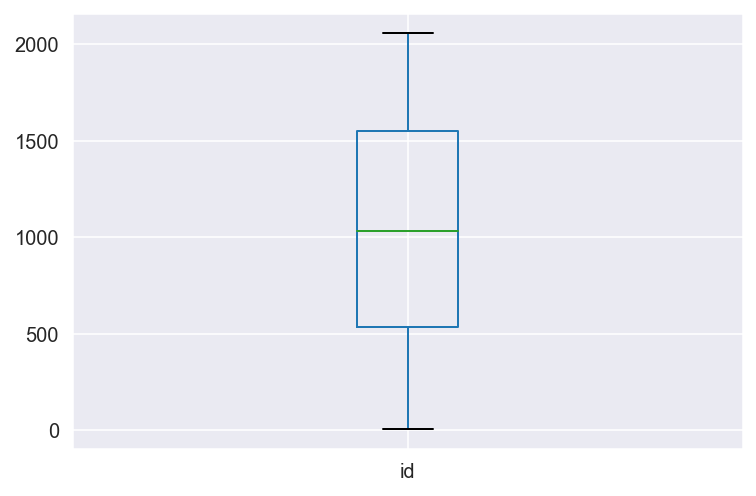

In [132]:
# Create a boxplot for the 'id' column in the DataFrame
data.boxplot(column=['id'])

# Display the boxplot
plt.show()

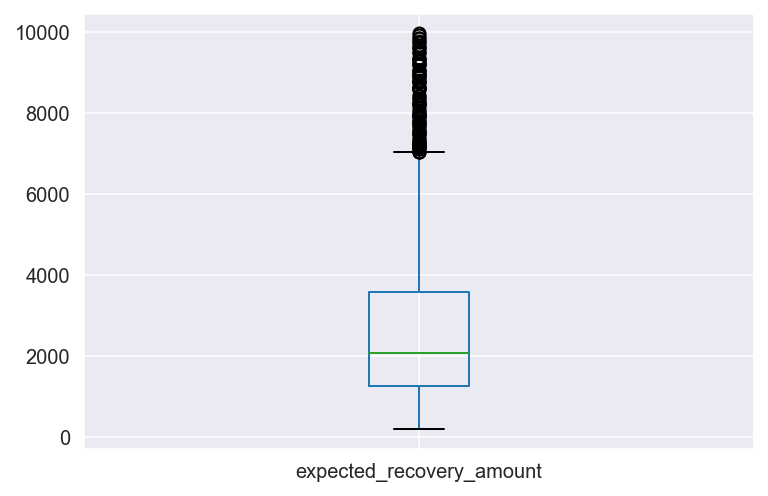

In [133]:
# Create a boxplot for the 'id' column in the DataFrame
data.boxplot(column=['expected_recovery_amount'])

# Display the boxplot
plt.show()

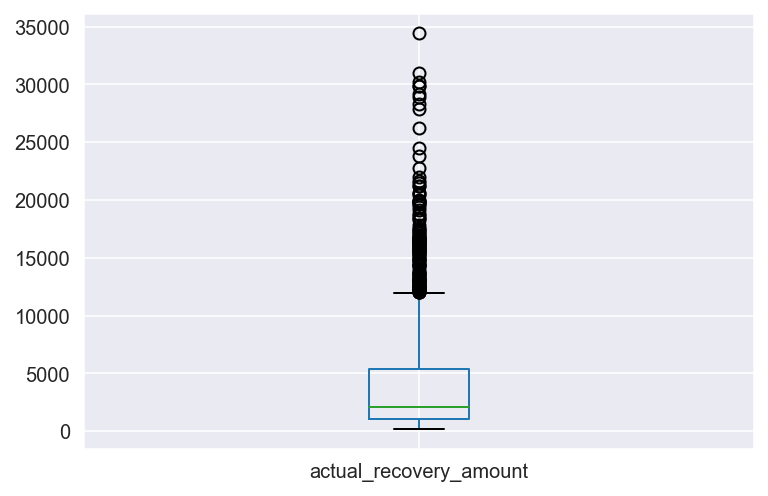

In [134]:
# Create a boxplot for the 'id' column in the DataFrame
data.boxplot(column=['actual_recovery_amount'])

# Display the boxplot
plt.show()

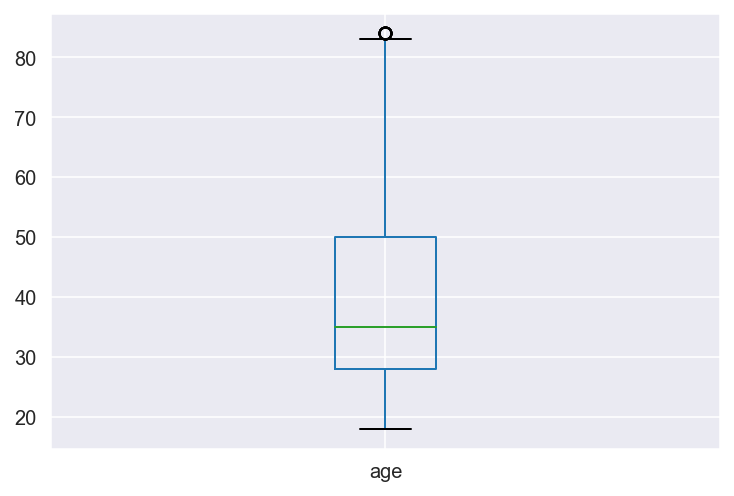

In [135]:
# Create a boxplot for the column in the DataFrame
data.boxplot(column=['age'])

# Display the boxplot
plt.show()

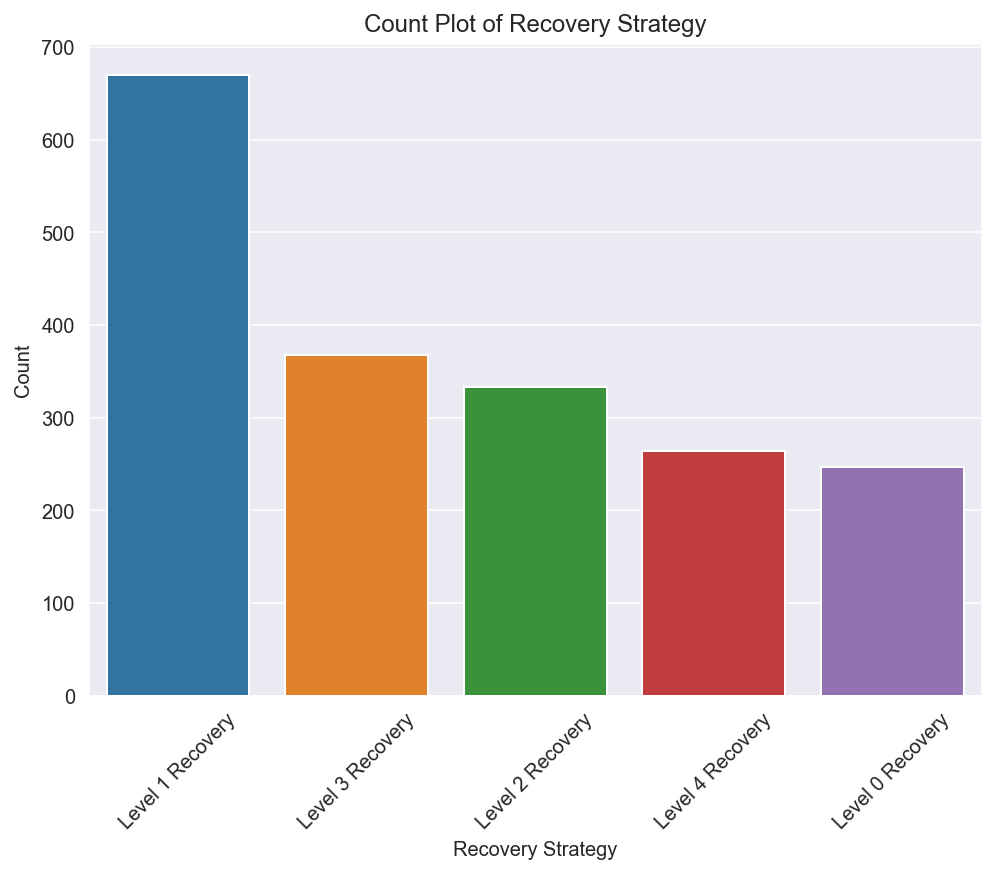

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your data into a DataFrame
df = pd.read_csv(r"C:\Users\ADMIN\Downloads\bank_data.csv")

# Create a count plot for the 'recovery_strategy' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='recovery_strategy', order=df['recovery_strategy'].value_counts().index)

# Add labels and a title to the plot
plt.xlabel("Recovery Strategy")
plt.ylabel("Count")
plt.title("Count Plot of Recovery Strategy")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Removing Outliers

In [137]:
def remove_outlier(col):   # expected_recovery_amount
    sorted(col)  # Sort the values in the column (but the sorted result is not stored)
    Q1, Q3 = col.quantile([0.25, 0.75])  # Calculate the 1st quartile (Q1) and 3rd quartile (Q3)
    IQR = Q3 - Q1  # Calculate the Interquartile Range (IQR)
    lower_range = Q1 - (1.5 * IQR)  # Calculate the lower bound for outliers
    upper_range = Q3 + (1.5 * IQR)  # Calculate the upper bound for outliers
    return lower_range, upper_range  # Return the lower and upper bounds

In [138]:
# Calculate lower and upper bounds for outliers using the remove_outlier function
lowscore, upscore = remove_outlier(data['expected_recovery_amount'])

# replace outliers in the 'expected_recovery_amount' column
data['expected_recovery_amount'] = np.where(data['expected_recovery_amount'] > upscore, upscore, data['expected_recovery_amount'])
data['expected_recovery_amount'] = np.where(data['expected_recovery_amount'] < lowscore, lowscore, data['expected_recovery_amount'])

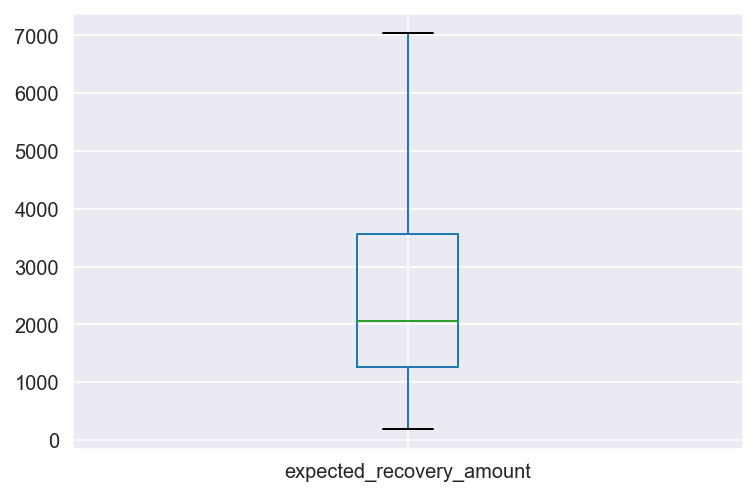

In [139]:
# Create a boxplot for the 'expected_recovery_amount' column in the DataFrame
data.boxplot(column=['expected_recovery_amount'])
# Display the boxplot
plt.show()

In [140]:
def remove_outlier(col):   #actual_recovery_amount
    sorted(col)  # Sort the values in the column (but the sorted result is not stored)
    Q1, Q3 = col.quantile([0.25, 0.75])  # Calculate the 1st quartile (Q1) and 3rd quartile (Q3)
    IQR = Q3 - Q1  # Calculate the Interquartile Range (IQR)
    lower_range = Q1 - (1.5 * IQR)  # Calculate the lower bound for outliers
    upper_range = Q3 + (1.5 * IQR)  # Calculate the upper bound for outliers
    return lower_range, upper_range  # Return the lower and upper bounds

In [141]:
# Calculate lower and upper bounds for outliers using the remove_outlier function
lowscore,upscore=remove_outlier(data['actual_recovery_amount'])

# replace outliers in the column
data['actual_recovery_amount']=np.where(data['actual_recovery_amount']>upscore,upscore,data['actual_recovery_amount'])
data['actual_recovery_amount']=np.where(data['actual_recovery_amount']<lowscore,lowscore,data['actual_recovery_amount'])

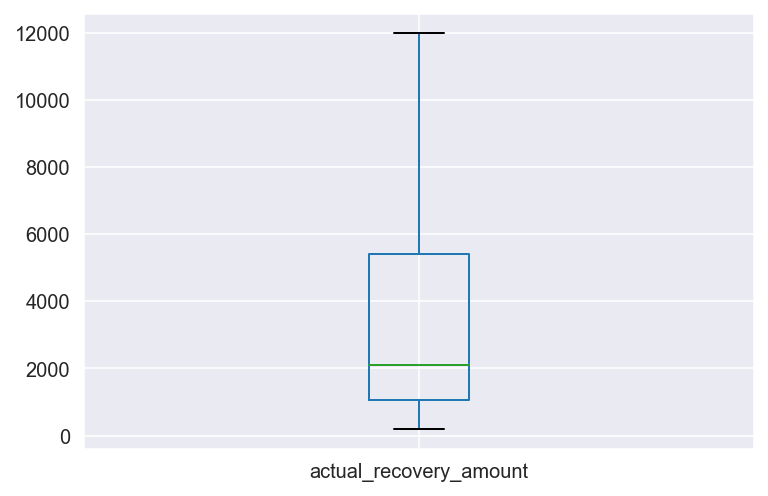

In [142]:
# Create a boxplot
data.boxplot(column=['actual_recovery_amount'])
# Display the boxplot
plt.show()

In [143]:
def remove_outlier(col):    # age
    sorted(col)  # Sort the values in the column (but the sorted result is not stored)
    Q1, Q3 = col.quantile([0.25, 0.75])  # Calculate the 1st quartile (Q1) and 3rd quartile (Q3)
    IQR = Q3 - Q1  # Calculate the Interquartile Range (IQR)
    lower_range = Q1 - (1.5 * IQR)  # Calculate the lower bound for outliers
    upper_range = Q3 + (1.5 * IQR)  # Calculate the upper bound for outliers
    return lower_range, upper_range  # Return the lower and upper bounds

In [144]:
# Calculate lower and upper bounds for outliers using the remove_outlier function
lowscore,upscore=remove_outlier(data['age'])

# replace outliers in the column
data['age']=np.where(data['age']>upscore,upscore,data['age'])
data['age']=np.where(data['age']<lowscore,lowscore,data['age'])

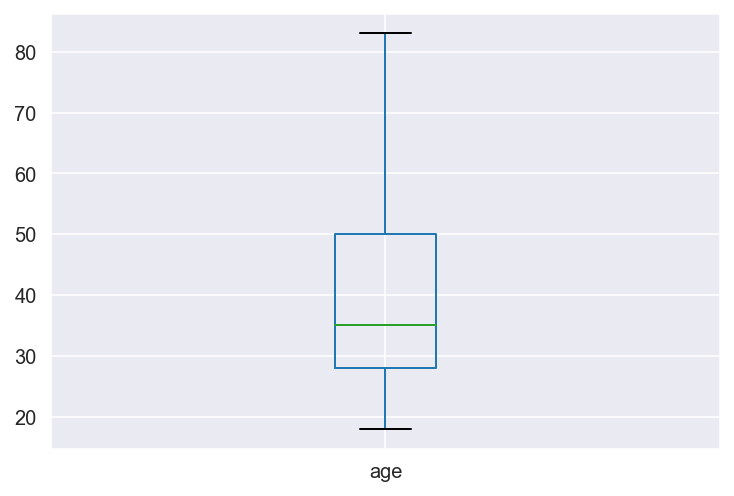

In [145]:
# Create a boxplot
data.boxplot(column=['age'])
# Display the boxplot
plt.show()

# Exploratory Data Analysis

# Correlation and Heat Map

In [146]:
# where each cell represents the correlation between two columns, 
data.corr() # computes the correlation coefficients between all pairs of numeric columns

,id,expected_recovery_amount,actual_recovery_amount,age
id,1.000000,-0.107488,-0.064326,-0.073002
expected_recovery_amount,-0.107488,1.000000,0.944277,0.827533
actual_recovery_amount,-0.064326,0.944277,1.000000,0.795594
age,-0.073002,0.827533,0.795594,1.000000


<AxesSubplot:>

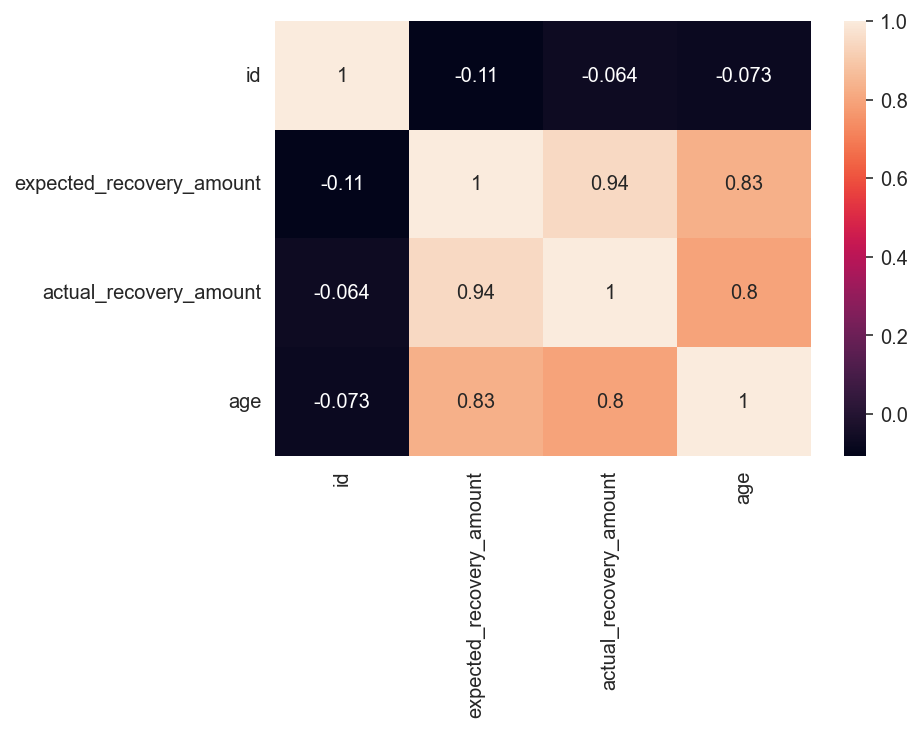

In [147]:
# Calculate the correlation matrix for the DataFrame 'data'
correlation = data.corr()

# Create a heatmap visualization of the correlation matrix
# Set x-axis (horizontal axis) and y-axis (vertical axis) labels using column names, and annotate with correlation values
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

# Pair Plot

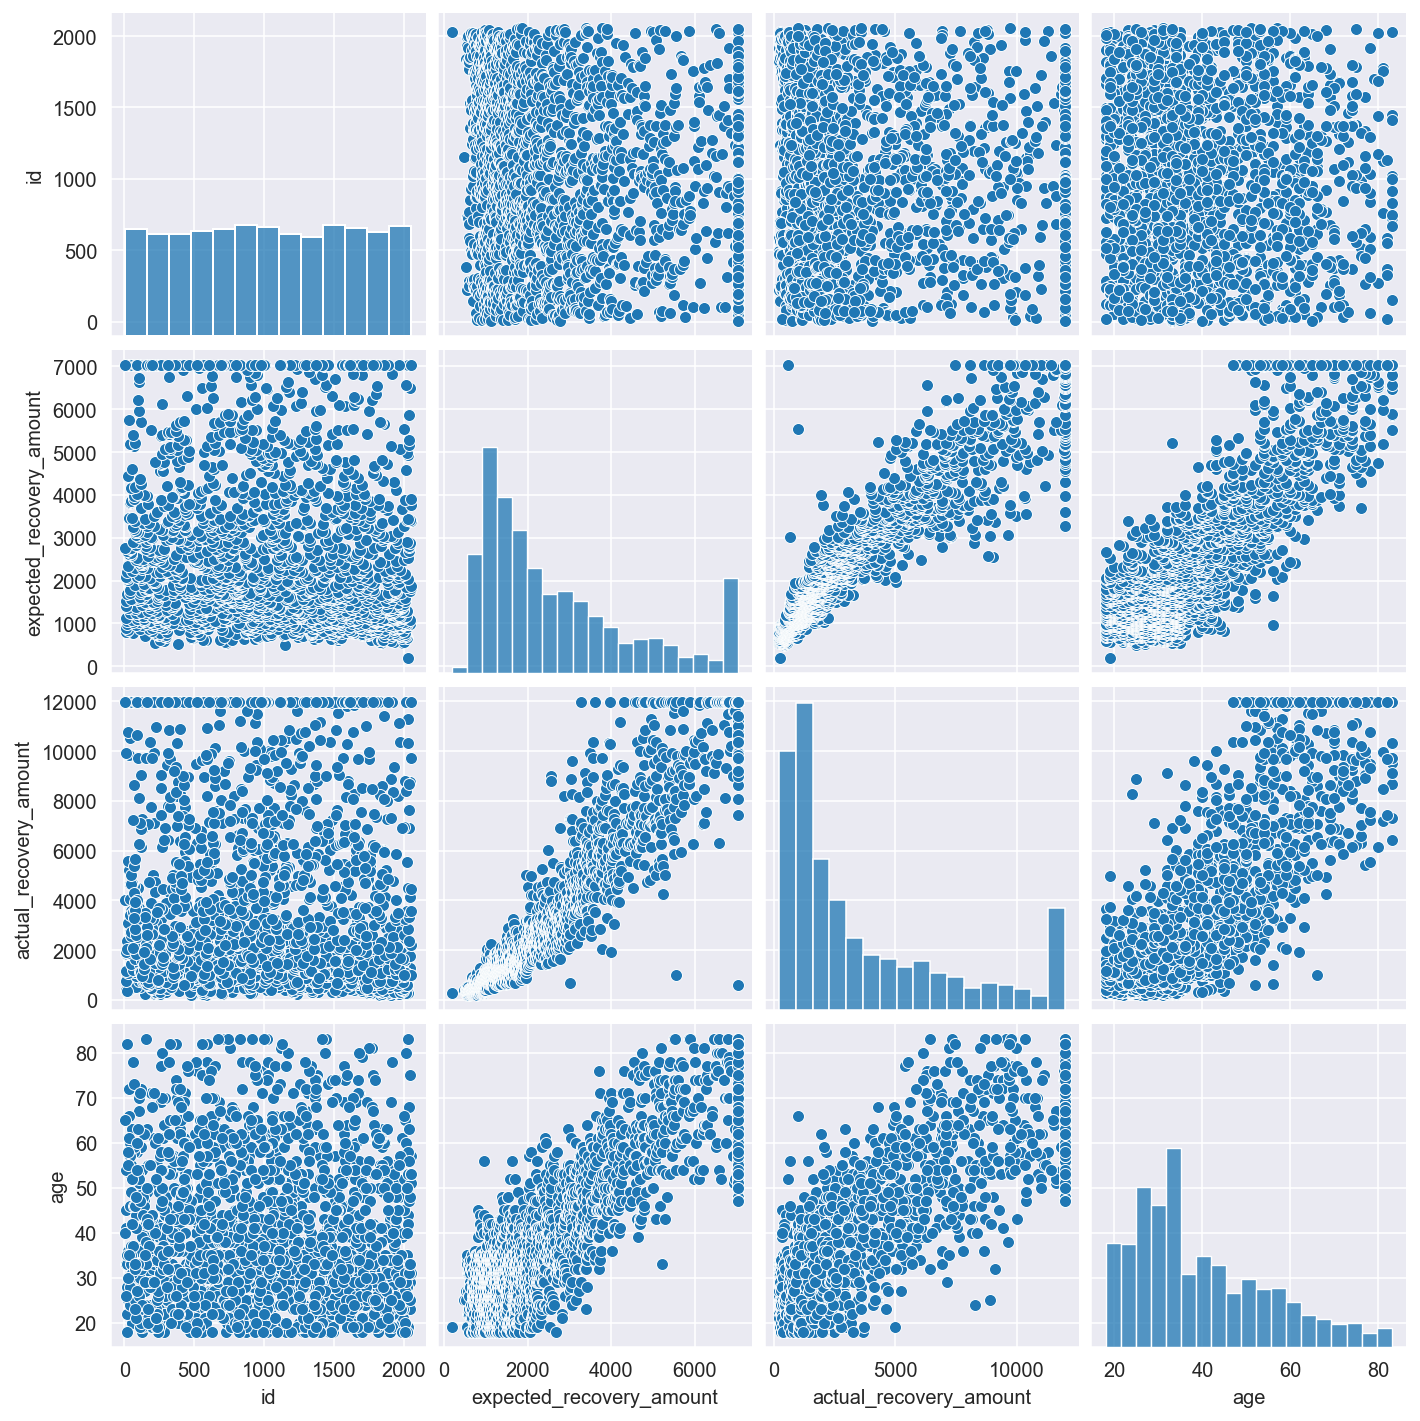

In [148]:
# Create a pairplot to visualize pairwise relationships and creates scatterplots for each combination
sns.pairplot(data)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


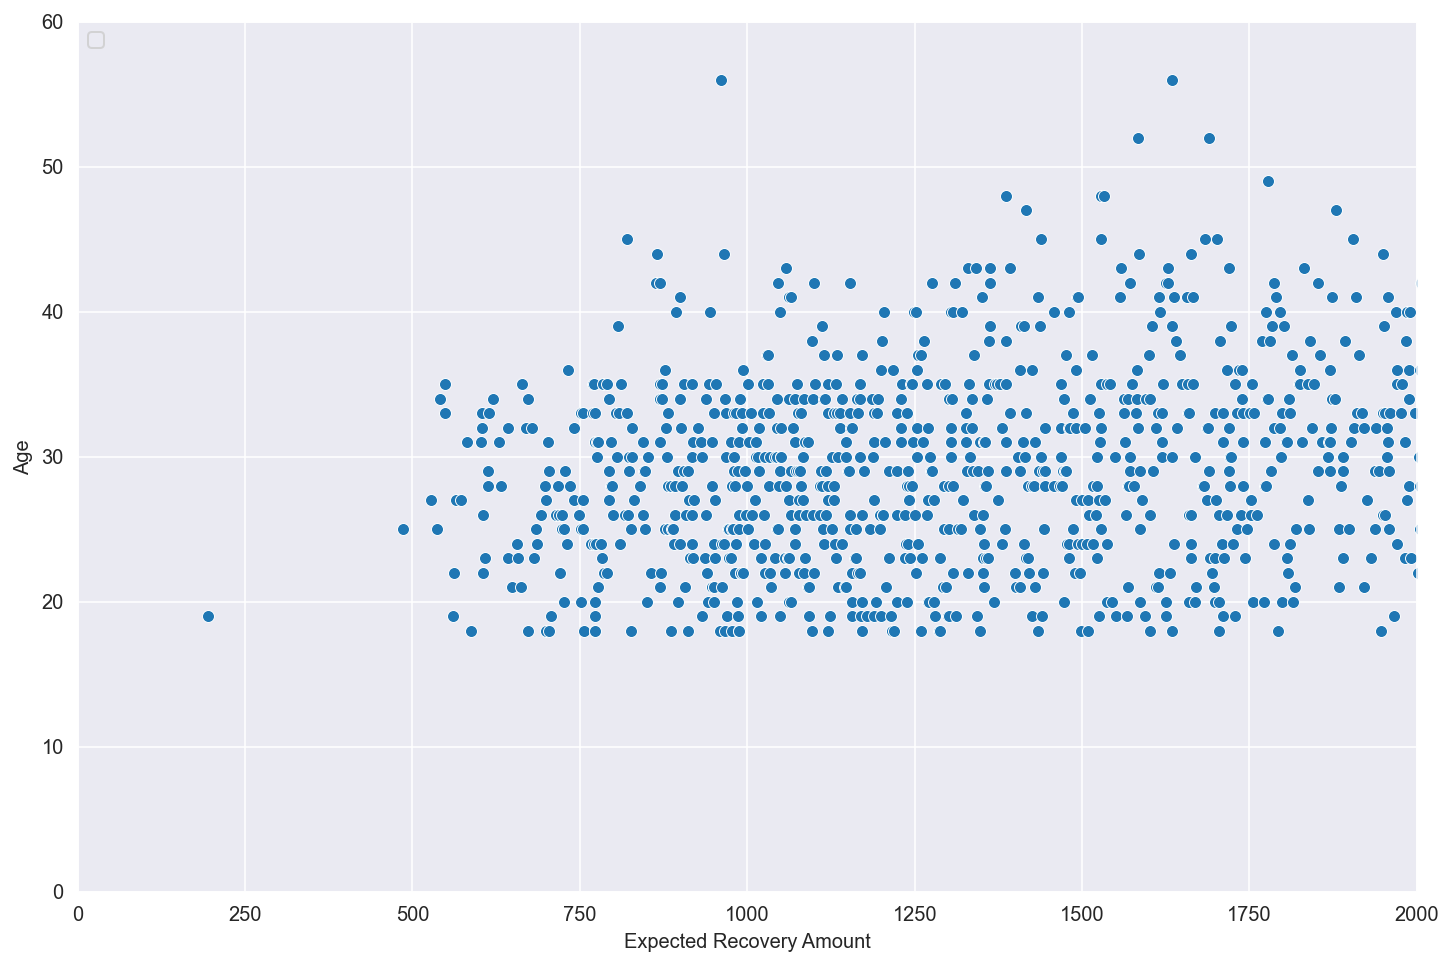

In [149]:
# Create a figure and axis for the plot with a specified size
fig, ax = plt.subplots(figsize=(12, 8))

# Set the plot style to "darkgrid"
sns.set_style("darkgrid")

# Scatter plot of Age vs. Expected Recovery Amount
sns.scatterplot(x=data['expected_recovery_amount'], y=data['age'])

# Set the x-axis and y-axis limits
plt.xlim(0, 2000)  # This line sets the limits of the x-axis to range from 0 to 2000
plt.ylim(0, 60)    #T his line sets the limits of the y-axis to range from 0 to 60

# Set labels for the x-axis and y-axis
plt.xlabel("Expected Recovery Amount")  # The x-axis will display the values of 'Expected Recovery Amount'
plt.ylabel("Age")                       # The y-axis will display the values of 'Age'

# Add a legend to the plot (though there are no labels specified)
plt.legend(loc=2)   # The loc parameter specifies the location of the legend
# loc=2 means the legend will be placed in the upper left corner of the plot

# Relation plot
# Histogram plot

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

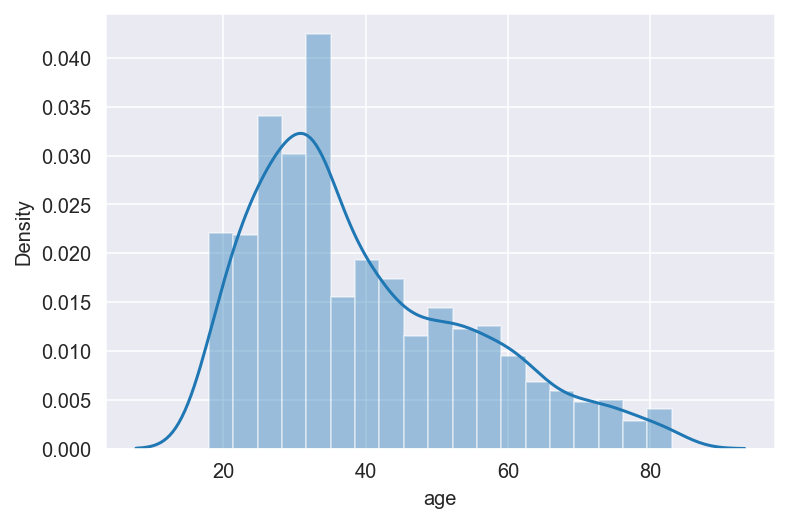

In [150]:
# # Create a distribution plot (histogram) for the 'age' column in the DataFrame 'data'
sns.distplot(data['age'])
# useful for visualizing the frequency or density of values within a single variable

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='expected_recovery_amount', ylabel='Density'>

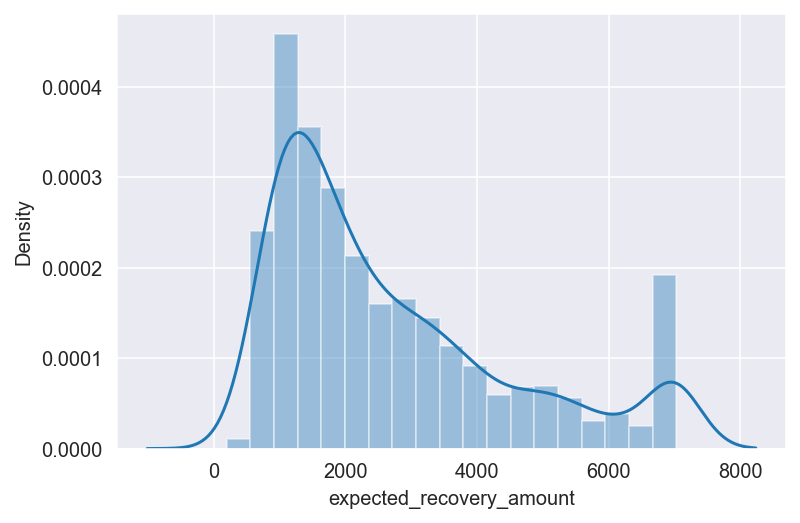

In [151]:
sns.distplot(data['expected_recovery_amount'])

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='actual_recovery_amount', ylabel='Density'>

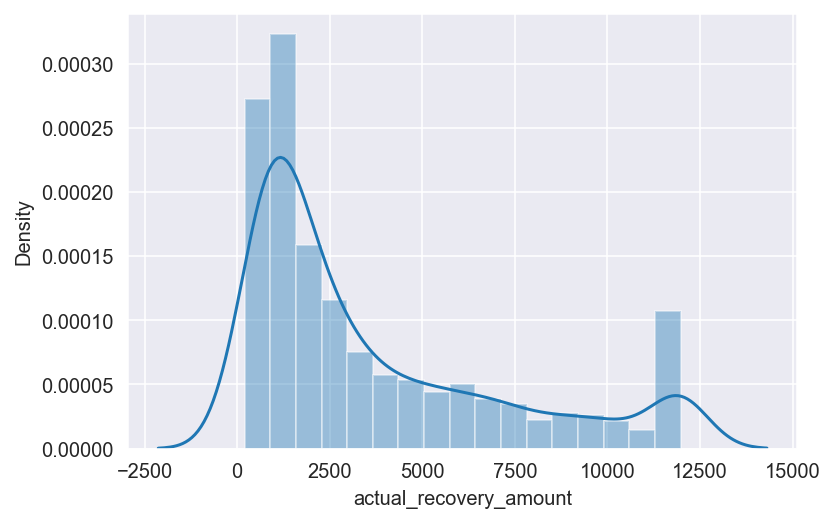

In [152]:
sns.distplot(data['actual_recovery_amount'])

<AxesSubplot:xlabel='age', ylabel='Count'>

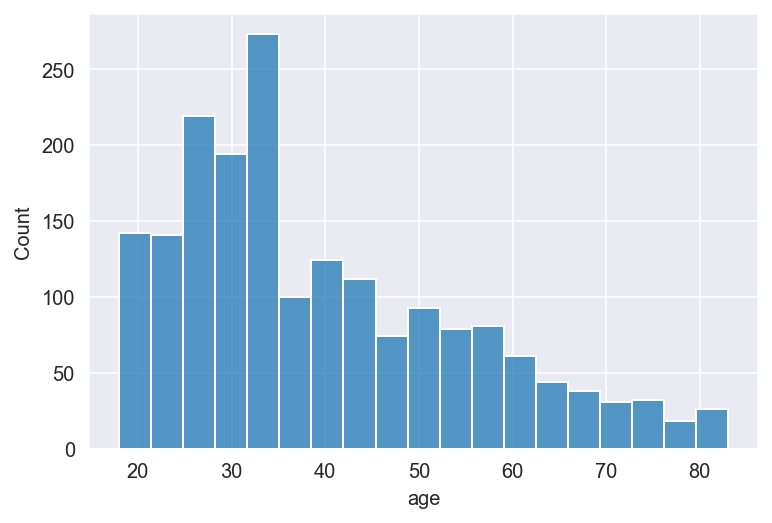

In [153]:
sns.histplot(data['age'])

<AxesSubplot:xlabel='expected_recovery_amount', ylabel='Count'>

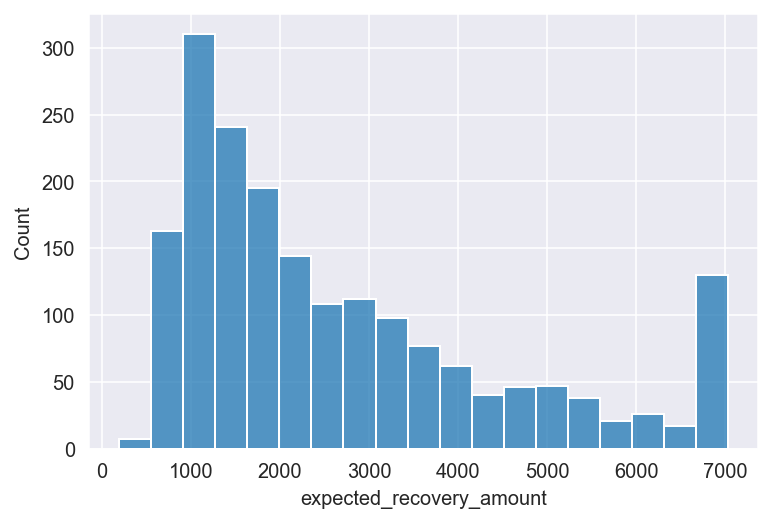

In [154]:
sns.histplot(data['expected_recovery_amount'])

<AxesSubplot:xlabel='actual_recovery_amount', ylabel='Count'>

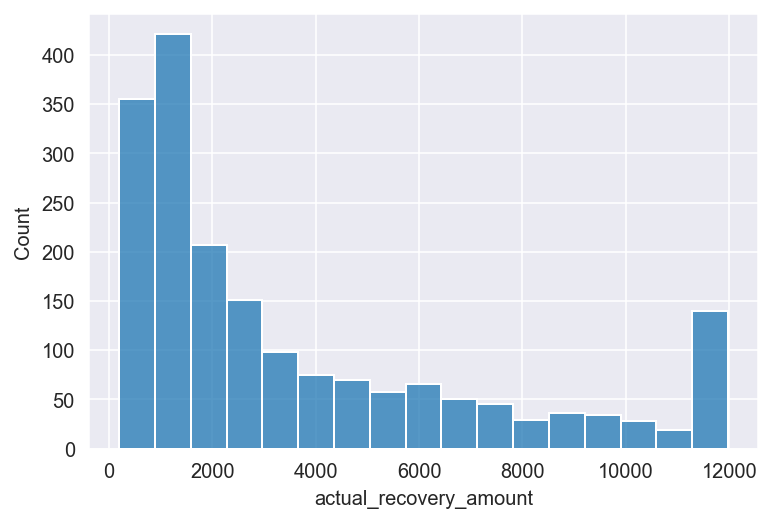

In [155]:
sns.histplot(data['actual_recovery_amount'])

# Catplot: Catplot is a relatively new addition to Seaborn that simplifies plotting that involves categorical variables

<AxesSubplot:xlabel='actual_recovery_amount', ylabel='age'>

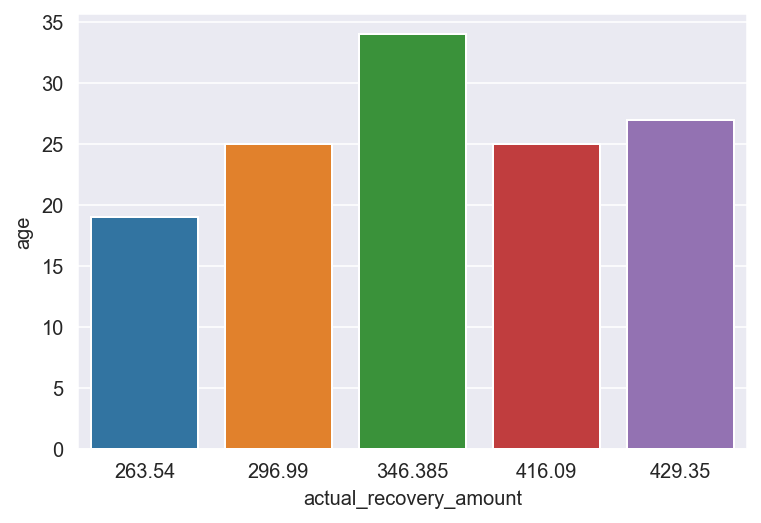

In [156]:
# Create a barplot with 'actual_recovery_amount' on the x-axis and 'age' on the y-axis for the top 5 rows of the DataFrame 'data'
sns.barplot(x=data['actual_recovery_amount'].head(5), y=data['age'])

# used to visualize the relationship between a categorical variable (in this case, 'actual_recovery_amount') and a continuous variable (in this case, 'age')
# It displays the average value of the continuous variable for each category of the categorical variable as a bar

<AxesSubplot:xlabel='expected_recovery_amount', ylabel='age'>

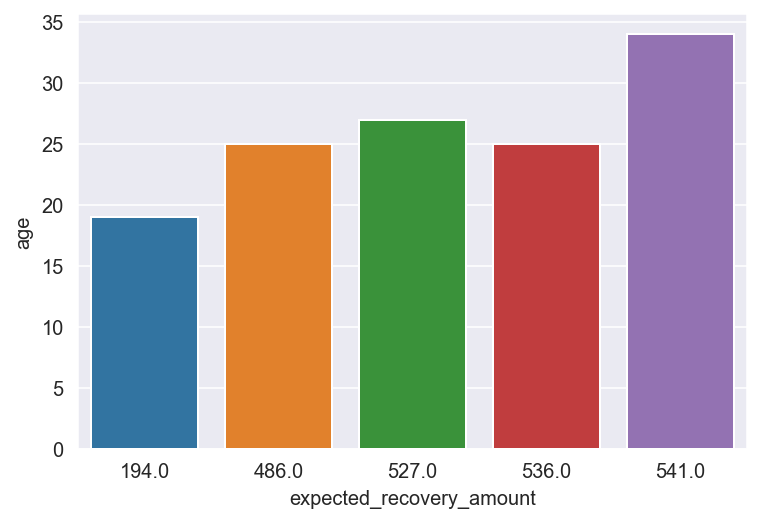

In [157]:
# Create a barplot with 'expected_recovery_amount' on the x-axis and 'age' on the y-axis
# Using data from the top 5 rows of the DataFrame 'data'
sns.barplot(x=data['expected_recovery_amount'].head(5), y=data['age'])

<AxesSubplot:xlabel='expected_recovery_amount', ylabel='actual_recovery_amount'>

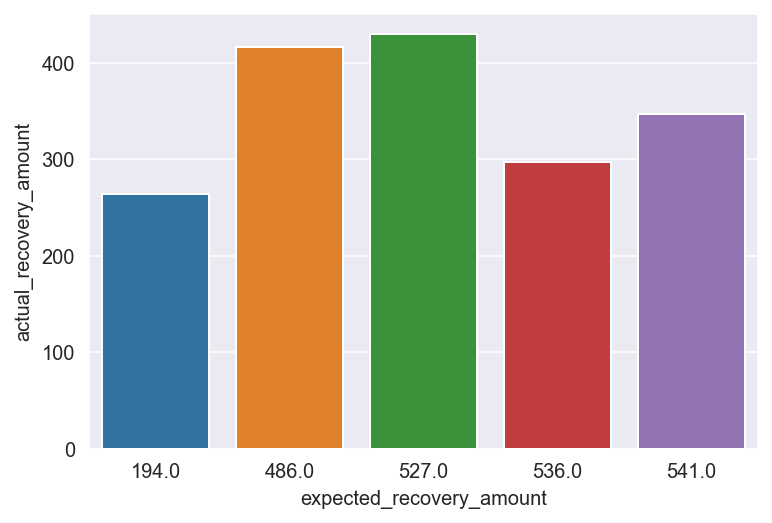

In [158]:
sns.barplot(x=data['expected_recovery_amount'].head(5),y=data['actual_recovery_amount'])

<AxesSubplot:xlabel='age', ylabel='sex'>

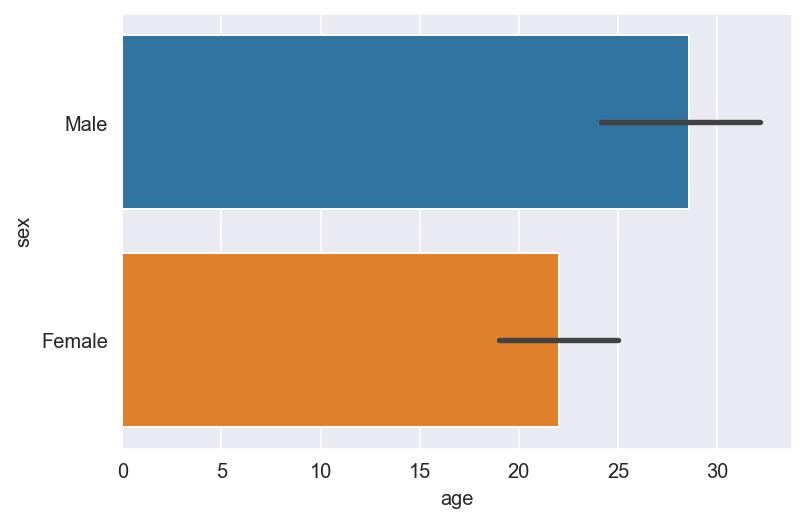

In [159]:
sns.barplot(x=data['age'].head(10),y=data['sex'])

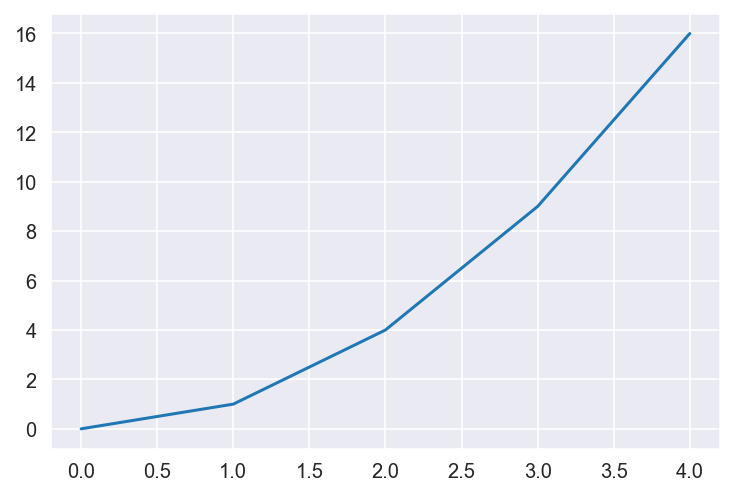

In [160]:
# Define data for the x and y axes
x = range(5)  # x-axis values ranging from 0 to 4
y = [i ** 2 for i in x]  # y-axis values representing the square of each x value

# Create a line plot using Matplotlib
plt.plot(x, y)

# Display the plot
plt.show()

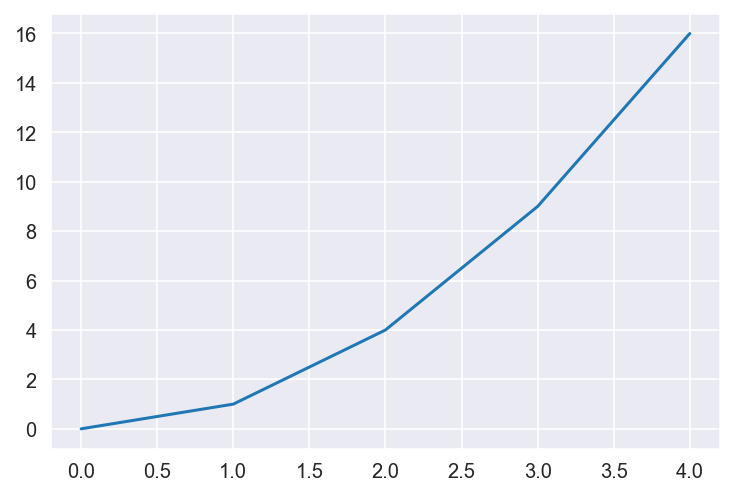

In [161]:
# Configure the figure format for higher-resolution plots in a Jupyter Notebook
%config InlineBackend.figure_format ='retina'

# Create and display a plot
plt.plot(x, y)
plt.show()

# Graphical Exploratory Data Analysis

In [162]:
# Extract the 'expected_recovery_amount' column from the DataFrame and assign it to 'column_name'
column_name = data.expected_recovery_amount

# Display the first few rows of the 'column_name'
column_name.head()

0    194.0
1    486.0
2    527.0
3    536.0
4    541.0
Name: expected_recovery_amount, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


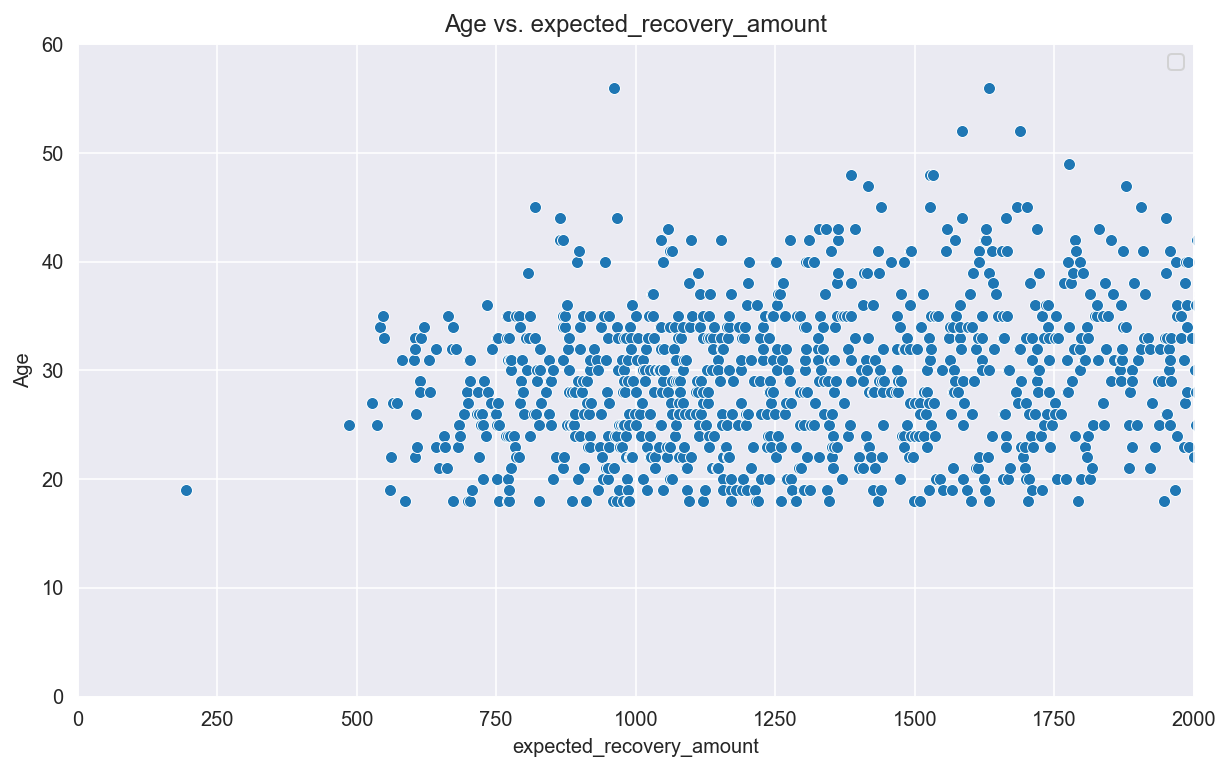

In [163]:
# Scatter plot of age vs. expected recovery amount
# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))   # Set the size of the plot figure (width and height)
# Specify the data source and the variables for the scatter plot
# 'expected_recovery_amount' is plotted on the x-axis, and 'age' is plotted on the y-axis.
sns.scatterplot(data=df, x='expected_recovery_amount', y='age')
#plt.axvline(x=2000, color='red', linestyle='--', label='Threshold $1000')
plt.title('Age vs. expected_recovery_amount')    # Set the title of the plot
# Limit the x-axis and y-axis ranges for better visualization
plt.xlim(0, 2000)   # Set the x-axis limit from 0 to 2000
plt.ylim(0, 60)     # Set the y-axis limit from 0 to 60
# Label the x-axis and y-axis
plt.xlabel('expected_recovery_amount')
plt.ylabel('Age')
plt.legend()   # Display a legend (although there are no specific legend labels defined)
plt.show()   # Show the plot

# Statistical test: age vs. expected recovery amount

In [164]:
# Filter data for Expected Recovery Amount in the range of $900 to $1100

# Create a boolean mask that checks if 'expected_recovery_amount' is within the specified range
threshold_range = (data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1100)

# Use the boolean mask to filter the DataFrame 'data' and create a new DataFrame 'filtered_data'
filtered_data = df[threshold_range]

# Split data into two groups: above and below $1000 threshold

# Create two separate DataFrames, 'above_threshold' and 'below_threshold,' based on the 'expected_recovery_amount' condition
above_threshold = filtered_data[filtered_data['expected_recovery_amount'] > 1000]
below_threshold = filtered_data[filtered_data['expected_recovery_amount'] <= 1000]

# Calculate the average age for both groups

# Calculate the mean (average) age for the customers above the $1000 threshold
average_age_above = above_threshold['age'].mean()

# Calculate the mean (average) age for the customers below or equal to the $1000 threshold
average_age_below = below_threshold['age'].mean()

# Print the results

# Display the average age above the $1000 threshold with two decimal places
print(f'Average age above $1000 threshold: {average_age_above:.2f} years')

# Display the average age below the $1000 threshold with two decimal places
print(f'Average age below $1000 threshold: {average_age_below:.2f} years')


Average age above $1000 threshold: 28.68 years
Average age below $1000 threshold: 27.22 years


In [165]:
# Define the threshold value
threshold = 1000

# Filter data for Expected Recovery Amounts within the range of $900 to $1100
era_900_1100 = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] < 1100)]

# Group data by recovery strategy
by_recovery_strategy = era_900_1100.groupby('recovery_strategy')

# Perform Kruskal-Wallis test for age for Level 0 and Level 1 Recovery

# Extract the 'age' values for 'Level 0 Recovery' and 'Level 1 Recovery' from the grouped data
Level_0_age = by_recovery_strategy.get_group('Level 0 Recovery')['age']  
Level_1_age = by_recovery_strategy.get_group('Level 1 Recovery')['age']
# Use the stats.kruskal() function to perform the Kruskal-Wallis test, comparing the age distributions between these two groups
kruskal_test_result = stats.kruskal(Level_0_age, Level_1_age)

# Print the Kruskal-Wallis test result
print("Kruskal-Wallis Test Result:")

# The Kruskal-Wallis test is used to determine if there are statistically significant differences 
# in the central tendencies (in this case, the age) of two or more groups.
# comparing age distributions of 'Level 0 Recovery' and 'Level 1 Recovery' within the specified Expected Recovery Amount range

# Print the test statistic, which represents the result of the Kruskal-Wallis test
print("Statistic:", kruskal_test_result.statistic)

# Print the p-value associated with the Kruskal-Wallis test.
# The p-value indicates the probability of observing the data if there were no significant differences between the groups
print("P-value:", kruskal_test_result.pvalue)


Kruskal-Wallis Test Result:
Statistic: 3.4572342749517513
P-value: 0.06297556896097407


In [166]:
# Print the columns of the 'filtered_data' DataFrame
print(filtered_data.columns)

# Group the 'filtered_data' DataFrame by the 'recovery_strategy' column
# and assign it to a variable 'by_recovery_strategy'
by_recovery_strategy = filtered_data.groupby(['recovery_strategy'])


Index(['id', 'expected_recovery_amount', 'actual_recovery_amount',
       'recovery_strategy', 'age', 'sex'],
      dtype='object')


In [167]:
# Group the 'filtered_data' DataFrame by the 'recovery_strategy' column
by_recovery_strategy = filtered_data.groupby(['recovery_strategy'])
# Calculate descriptive statistics for the 'age' column within each group and unstack the result
# This creates a table where recovery strategies are rows and statistics are columns
by_recovery_strategy['age'].describe().unstack()

       recovery_strategy
count  Level 0 Recovery     89.000000
       Level 1 Recovery     95.000000
mean   Level 0 Recovery     27.224719
       Level 1 Recovery     28.684211
std    Level 0 Recovery      6.399135
       Level 1 Recovery      5.869617
min    Level 0 Recovery     18.000000
       Level 1 Recovery     18.000000
25%    Level 0 Recovery     23.000000
       Level 1 Recovery     24.000000
50%    Level 0 Recovery     26.000000
       Level 1 Recovery     29.000000
75%    Level 0 Recovery     31.000000
       Level 1 Recovery     33.000000
max    Level 0 Recovery     56.000000
       Level 1 Recovery     43.000000
dtype: float64

# Statistical test: sex vs. expected recovery amount

In [168]:
# Define the threshold range
threshold_min = 900
threshold_max = 1100

# Filter data for Expected Recovery Amounts within the specified range
filtered_data = data[(data['expected_recovery_amount'] >= threshold_min) & (data['expected_recovery_amount'] < threshold_max)]

# Create a contingency table for 'recovery_strategy' vs. 'sex'
crosstab = pd.crosstab(filtered_data['recovery_strategy'], filtered_data['sex'])

# Perform chi-squared test for independence
chi2_stat, p_val, _, _ = stats.chi2_contingency(crosstab)


# Print the Contingency Table:
# The contingency table is a tabular representation of the observed frequencies of two categorical variables
# in this case, 'sex' and whether the Expected Recovery Amount is above or below the threshold

print("Contingency Table:")
print(crosstab)

# Print the Chi-Squared Test P-Value:
# The chi-squared test is used to determine if there is a significant association between two categorical variables
# in this case, 'sex' and whether the Expected Recovery Amount is above or below the threshold 

# p-value associated with chi-squared test indicates probability of observing data if there were no significant association between the two variables
# A low p-value (typically below 0.05) suggests evidence against the null hypothesis and implies that there is a significant association between 'sex' and the Expected Recovery Amountbeing above or below the threshold.

print("\nChi-Squared Test P-Value:", p_val)

Contingency Table:
sex                Female  Male
recovery_strategy              
Level 0 Recovery       32    57
Level 1 Recovery       39    55

Chi-Squared Test P-Value: 0.5377947810444592


The "Contingency Table" displays the observed frequencies of the two categorical variables ('sex' and whether Expected Recovery Amount is above or below the threshold). It helps visualize how the data is distributed across categories.

The "Chi-Squared Test P-Value" represents the probability of observing the data if there were no significant association between 'sex' and the Expected Recovery Amount being above or below the threshold. A small p-value (typically less than 0.05) suggests that there is a significant association between these variables.


# Exploratory graphical analysis: recovery amount

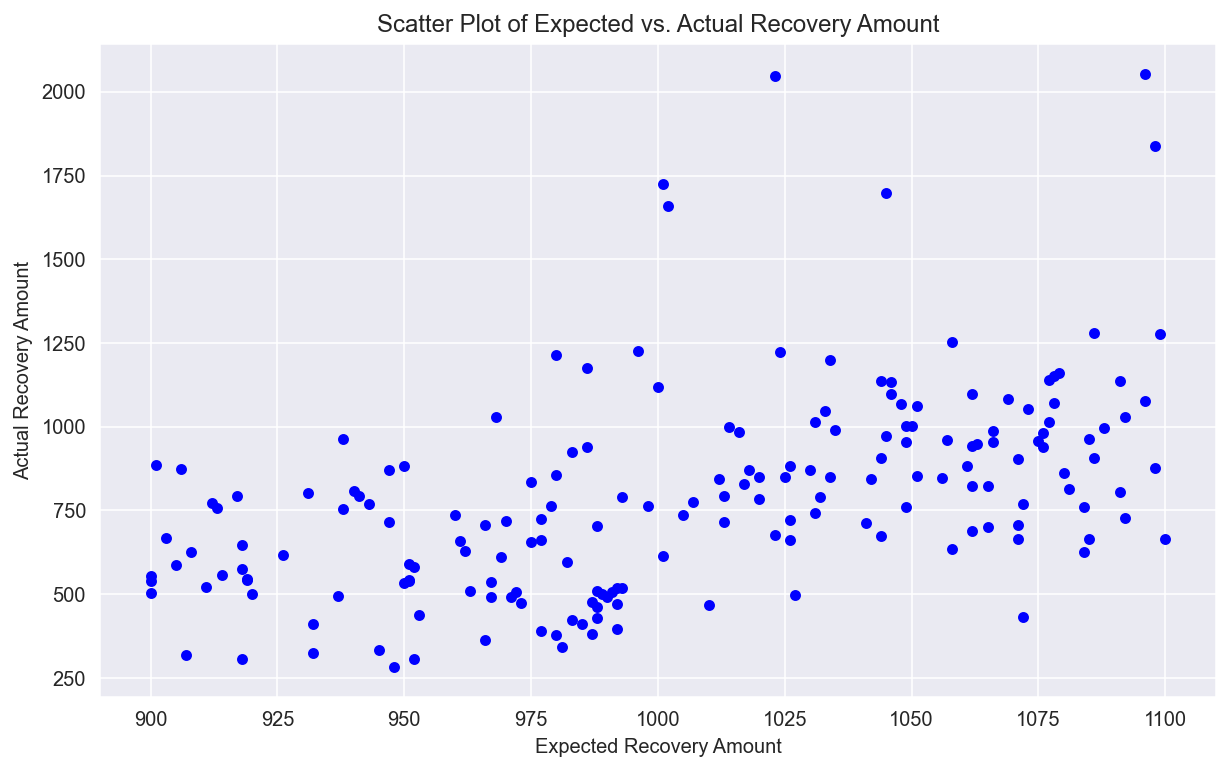

In [169]:
# Define the threshold range
threshold_min = 900  # Minimum threshold value
threshold_max = 1100  # Maximum threshold value

# Filter data for Expected Recovery Amounts within the specified range
filtered_data = data[(data['expected_recovery_amount'] >= threshold_min) & (data['expected_recovery_amount'] <= threshold_max)]

# Create a scatter plot of Expected Recovery Amount vs. Actual Recovery Amount
plt.figure(figsize=(10, 6))  # Create a new figure with a specific size (width=10, height=6)

# Scatter plot:
# 'x' specifies the x-values (Expected Recovery Amount)
# 'y' specifies the y-values (Actual Recovery Amount)
# 'c' sets the color of the markers to blue ('b')
# 'marker' sets the marker style to circles ('o')
# 's' sets the marker size to 20
plt.scatter(x=filtered_data['expected_recovery_amount'], y=filtered_data['actual_recovery_amount'], c='b', marker='o', s=20)

# Set labels for the x-axis and y-axis
plt.xlabel("Expected Recovery Amount")  # Label for the x-axis
plt.ylabel("Actual Recovery Amount")    # Label for the y-axis

# Add a vertical line at the $1000 threshold (optional, currently commented out)
# plt.axvline(x=1000, color='r', linestyle='--', linewidth=2, label='Threshold ($1000)')

# Add a legend (optional, currently commented out)
# plt.legend(loc='upper left')

# Set the title of the plot
plt.title("Scatter Plot of Expected vs. Actual Recovery Amount")

# Enable the grid in the plot
plt.grid(True)

# Show the plot
plt.show()  # Display the plot on the screen

# Statistical analysis: recovery amount

In [170]:
# Compute average actual recovery amount just below and above the threshold
# Using 'describe' to get statistics for actual recovery amount by recovery strategy
# recovery_stats = by_recovery_strategy['actual_recovery_amount'].describe().unstack()
# print(recovery_stats)

# Perform Kruskal-Wallis test for the entire range from $900 to $1100
# Extract actual recovery amounts for Level 0 and Level 1 Recovery strategies
Level_0_actual = era_900_1100.loc[df['recovery_strategy'] == 'Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = era_900_1100.loc[df['recovery_strategy'] == 'Level 1 Recovery']['actual_recovery_amount']

# Perform the Kruskal-Wallis test
kruskal_result_1 = stats.kruskal(Level_0_actual, Level_1_actual)
print("Kruskal-Wallis Test for $900 to $1100:")
print("Test Statistic:", kruskal_result_1.statistic)  # Print the test statistic
print("P-value:", kruskal_result_1.pvalue)  # Print the p-value associated with the test

# Repeat the analysis for a smaller range from $950 to $1050
# Extract actual recovery amounts for Level 0 and Level 1 Recovery strategies
era_950_1050 = df.loc[(df['expected_recovery_amount'] < 1050) & (df['expected_recovery_amount'] >= 950)]
Level_0_actual_2 = era_950_1050.loc[df['recovery_strategy'] == 'Level 0 Recovery']['actual_recovery_amount']
Level_1_actual_2 = era_950_1050.loc[df['recovery_strategy'] == 'Level 1 Recovery']['actual_recovery_amount']


# Perform the Kruskal-Wallis test to compare actual recovery amounts between Level 0 and Level 1 Recovery strategies for the smaller range
kruskal_result_2 = stats.kruskal(Level_0_actual_2, Level_1_actual_2)

# Print the results of the Kruskal-Wallis test for the $950 to $1050 range
print("\nKruskal-Wallis Test for $950 to $1050:")
print("Test Statistic:", kruskal_result_2.statistic)  # Print the test statistic
print("P-value:", kruskal_result_2.pvalue)  # Print the p-value associated with the test

Kruskal-Wallis Test for $900 to $1100:
Test Statistic: 65.37966302528878
P-value: 6.177308752803109e-16

Kruskal-Wallis Test for $950 to $1050:
Test Statistic: 30.246000000000038
P-value: 3.80575314300276e-08


# Regression modeling: no threshold

We now want to take a regression-based approach to estimate the impact of the program at the $1000 threshold using the data that is just above and just below the threshold. In order to do that, we will build two models. The first model does not have a threshold while the second model will include a threshold.
The first model predicts the actual recovery amount (outcome or dependent variable) as a function of the expected recovery amount (input or independent variable). We expect that there will be a strong positive relationship between these two variables.

In [171]:
# Model 1: No threshold
X1 = data['expected_recovery_amount']  # Independent variable
y = data['actual_recovery_amount']  # Dependent variable

# Add a constant (intercept) to the independent variable
X1 = sm.add_constant(X1)

# specifies the type of regression model we want to create, which is an Ordinary Least Squares (OLS) linear regression model
# OLS is a common method used for linear regression analysis
# y: This is the dependent variable or variable to predict.
# X: This is the independent variable or predictor variables. 
# The 'expected_recovery_amount' is used as a predictor, and 'indicator_1000' is an indicator variable 

# Build Model 1 (Regression without threshold)
model1 = sm.OLS(y, X1).fit()

# Model 2: With threshold indicator
# Create a binary threshold indicator (1 if expected_recovery_amount > 1000, else 0)
data['threshold_indicator'] = (data['expected_recovery_amount'] > 1000).astype(int)

X2 = data[['expected_recovery_amount', 'threshold_indicator']]  # Independent variables
X2 = sm.add_constant(X2)

# Build Model 2 (Regression with threshold indicator)
model2 = sm.OLS(y, X2).fit()

# Print model summaries
print("Model 1 (No Threshold):")
print(model1.summary())

print("\nModel 2 (With Threshold Indicator):")
print(model2.summary())

# Interpretation:
# create two regression models, Model 1 and Model 2.
# Model 1 predicts actual recovery amount using only 'expected_recovery_amount' as the independent variable.
# Model 2 includes an additional threshold indicator variable (0 or 1) to represent whether the amount is above or below $1000.
# The coefficient of the 'expected_recovery_amount' in Model 2 captures the impact of the true threshold.
# By comparing the models, we can assess the effect of the $1000 threshold on actual recovery amounts.


Model 1 (No Threshold):
                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.892
Model:                                OLS   Adj. R-squared:                  0.892
Method:                     Least Squares   F-statistic:                 1.547e+04
Date:                    Fri, 06 Oct 2023   Prob (F-statistic):               0.00
Time:                            20:31:44   Log-Likelihood:                -15943.
No. Observations:                    1882   AIC:                         3.189e+04
Df Residuals:                        1880   BIC:                         3.190e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

# Regression modeling: adding true threshold

In [172]:
# Create a binary indicator (0 or 1) for expected recovery amount >= $1000
df['indicator_1000'] = np.where(df['expected_recovery_amount'] < 1000, 0, 1)

# Filter data for expected recovery amounts between $900 and $1100
era_900_1100 = df.loc[(df['expected_recovery_amount'] < 1100) & (df['expected_recovery_amount'] >= 900)]

# Define independent variables (X) and the dependent variable (y)
X = era_900_1100[['expected_recovery_amount', 'indicator_1000']]  # X includes expected_recovery_amount and the threshold indicator
y = era_900_1100['actual_recovery_amount']  # y is the actual recovery amount

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X) 

# Build a linear regression model
# fit(): This method fits the linear regression model to your data. When you call .fit(), it performs the calculations necessary to estimate the coefficients (parameters) of the linear regression equation
# It determines the best-fitting line
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Interpretation:
# An indicator variable 'indicator_1000' is created to represent whether expected recovery amount is >= $1000.
# Data is filtered to include only records with expected recovery amounts between $900 and $1100.
# The linear regression model is built with 'expected_recovery_amount' and 'indicator_1000' as independent variables.
# The model's summary statistics, including coefficients and significance, are printed.


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.314
Model:                                OLS   Adj. R-squared:                  0.307
Method:                     Least Squares   F-statistic:                     41.22
Date:                    Fri, 06 Oct 2023   Prob (F-statistic):           1.83e-15
Time:                            20:31:44   Log-Likelihood:                -1272.0
No. Observations:                     183   AIC:                             2550.
Df Residuals:                         180   BIC:                             2560.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

It performs linear regression analysis to estimate the impact of the $1000 threshold using a binary threshold indicator and provides model summary statistics for interpretation.

# Regression modeling: adjusting the window

In [173]:
# Redefine era_950_1050 so the indicator variable is included
era_950_1050 = df.loc[(df['expected_recovery_amount']<1050) & 
                      (df['expected_recovery_amount']>=950)]

# Define X and y 
X = era_950_1050[['expected_recovery_amount','indicator_1000']]
y = era_950_1050['actual_recovery_amount']

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()
# fit(): This method fits the linear regression model to your data. When you call .fit(), it performs the calculations necessary to estimate the coefficients (parameters) of the linear regression equation
# It determines the best-fitting line

# Print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.283
Model:                                OLS   Adj. R-squared:                  0.269
Method:                     Least Squares   F-statistic:                     18.99
Date:                    Fri, 06 Oct 2023   Prob (F-statistic):           1.12e-07
Time:                            20:31:44   Log-Likelihood:                -692.92
No. Observations:                      99   AIC:                             1392.
Df Residuals:                          96   BIC:                             1400.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -279.5243   1840.707     -0.152      0.880   -3933.298    3374.250
expected_recovery_amount     0.9189      1.886      0.487      0.627      -2.825       4.663
indicator_1000             286.5337    111.352      2.573      0.012      65.502     507.566
==============================================================================
Omnibus:                       39.302   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.258
Skew:                           1.564   Prob(JB):                     1.37e-18
Kurtosis:                       6.186   Cond. No.                     6.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""